In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

C:\Users\Juhaninho\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
passes = pd.read_excel('extracted_data/passes.xlsx')

In [4]:
passes.head()

,duration,match_id,minute,period,position,second,under_pressure,recipient,length,angle,location_x,location_y,end_location_x,end_location_y,direction_x,direction_y,backheel,deflected,miscommunication,cross,cut_back,switch,shot_assist,goal_assist,team_id,player_id,ground_pass,low_pass,high_pass,drop_kick,head,keeper_arm,left_foot,right_foot,no_touch,corner,free_kick,goal_kick,interception,kick_off,recovery,throw_in,incomplete,injury_clearance,out,pass_offside,complete,inswinging,outswinging,straight,through_ball,pred_accuracy
0,0.806,9592,0,1,24,7,0,5203,13.000000,3.141593,61.0,41.0,48.0,41.0,-13.0,0.0,0,0,0,0,0,0,0,0,217,5246,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.991103
1,1.849,9592,0,1,11,9,0,6374,26.476404,1.380808,50.0,47.0,55.0,73.0,5.0,26.0,0,0,0,0,0,0,0,0,217,5203,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.972223
2,1.036,9592,0,1,2,13,0,5470,15.000000,-2.214297,60.0,73.0,51.0,61.0,-9.0,-12.0,0,0,0,0,0,0,0,0,217,6374,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.986239
3,1.237,9592,0,1,9,15,0,5213,19.723083,-2.102520,51.0,61.0,41.0,44.0,-10.0,-17.0,0,0,0,0,0,0,0,0,217,5470,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.988467
4,1.941,9592,0,1,3,18,0,5492,22.203604,-1.435269,42.0,39.0,45.0,17.0,3.0,-22.0,0,0,0,0,0,0,0,0,217,5213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.981515


In [5]:
passes.shape

(506317, 52)

In [6]:
len(passes['match_id'].unique())

485

In [7]:
X = passes.drop(['complete', 'incomplete', 'pass_offside', 'out', 'injury_clearance', 'player_id', 'team_id', 
                 'match_id', 'goal_assist', 'shot_assist', 'miscommunication',
                 'recipient', 'period', 'minute', 'second', 'position', 'pred_accuracy'], axis=1)
y = passes['complete']

In [8]:
X.head()

,duration,under_pressure,length,angle,location_x,location_y,end_location_x,end_location_y,direction_x,direction_y,backheel,deflected,cross,cut_back,switch,ground_pass,low_pass,high_pass,drop_kick,head,keeper_arm,left_foot,right_foot,no_touch,corner,free_kick,goal_kick,interception,kick_off,recovery,throw_in,inswinging,outswinging,straight,through_ball
0,0.806,0,13.000000,3.141593,61.0,41.0,48.0,41.0,-13.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1.849,0,26.476404,1.380808,50.0,47.0,55.0,73.0,5.0,26.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.036,0,15.000000,-2.214297,60.0,73.0,51.0,61.0,-9.0,-12.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.237,0,19.723083,-2.102520,51.0,61.0,41.0,44.0,-10.0,-17.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.941,0,22.203604,-1.435269,42.0,39.0,45.0,17.0,3.0,-22.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Feature Selection

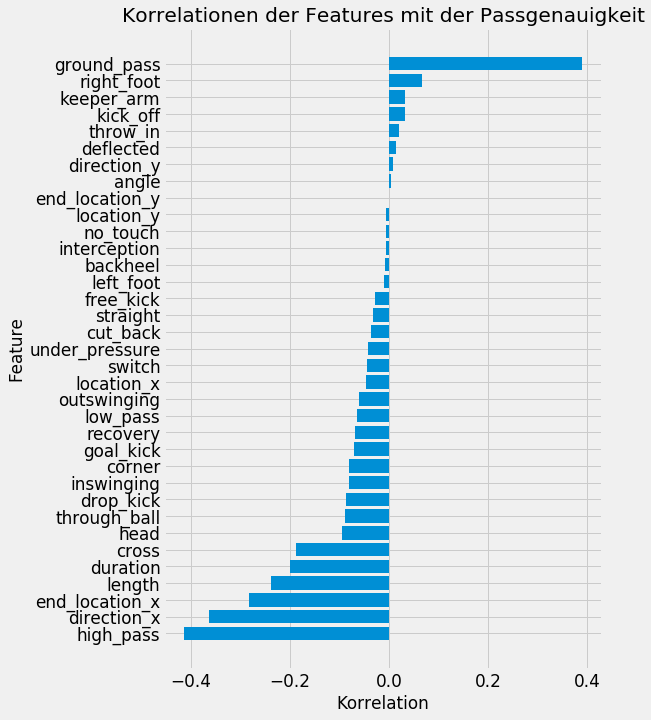

In [9]:
corrs = dict([[col, pearsonr(y, X[col])[0]] for col in X.columns])
corrs = dict(sorted(corrs.items(), key=lambda item: item[1]))
plt.figure(figsize=(7,11))
plt.barh(y=list(corrs.keys()), width=list(corrs.values()))
plt.title('Korrelationen der Features mit der Passgenauigkeit')
plt.ylabel('Feature')
plt.xlabel('Korrelation')
plt.show()

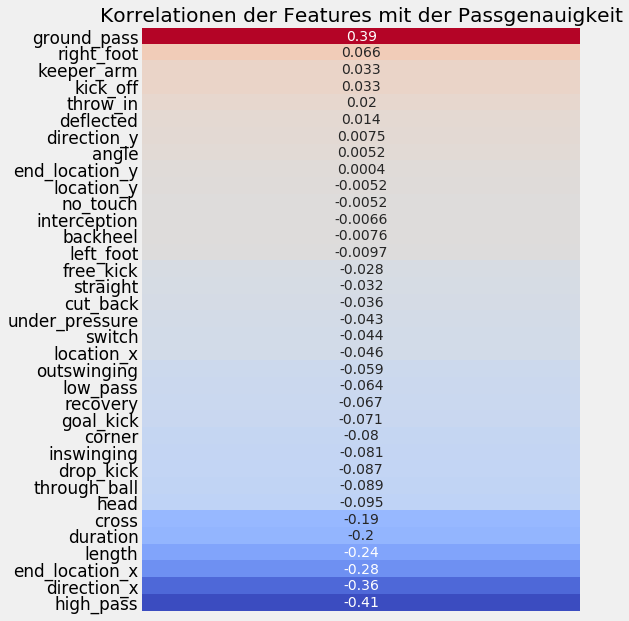

In [10]:
corrs = dict([[col, pearsonr(y, X[col])[0]] for col in X.columns])
corrs = dict(sorted(corrs.items(), key=lambda item: item[1], reverse=True))
df_corrs = pd.DataFrame()
df_corrs['feature'] = list(corrs.keys())
df_corrs['correlation'] = list(corrs.values())
plt.figure(figsize=(7,10))
sns.heatmap(df_corrs[['correlation']], yticklabels=df_corrs['feature'], xticklabels='',
            cmap='coolwarm', annot=True, cbar=False)
plt.title('Korrelationen der Features mit der Passgenauigkeit')
plt.show()

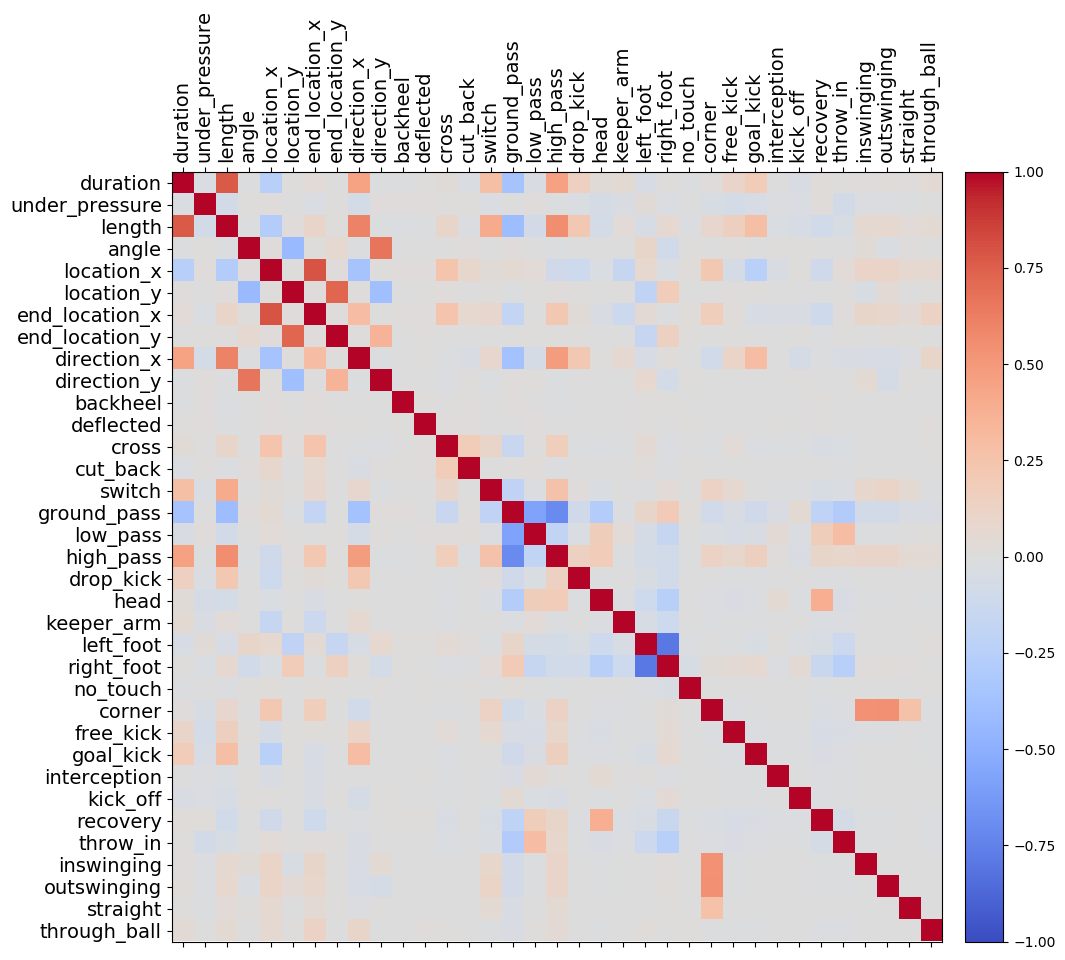

In [11]:
plt.style.use('default')
corr = X.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, pad=0.015)
ticks = np.arange(0, len(X.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns, fontsize=14)
ax.set_yticklabels(X.columns, fontsize=14)
plt.show()
plt.style.use('fivethirtyeight')

In [12]:
len(X.columns)

35

In [13]:
# Selected Features from FOCI
selected_features = ['high_pass', 'duration', 'angle', 'end_location_x', 'end_location_y', 'length', 'under_pressure', 
                     'head', 'deflected', 'throw_in', 'interception', 'recovery', 'free_kick', 'through_ball', 'cross',
                     'backheel', 'switch', 'no_touch']

In [14]:
len(selected_features)

18

In [15]:
# Selected Features from FOCI adapted with domain knowledge
selected_features = ['high_pass', 'duration', 'angle', 'end_location_x', 'end_location_y', 'direction_x',
                     'length', 'under_pressure', 'head', 'throw_in', 'recovery', 'free_kick', 'corner', 
                     'through_ball', 'cross', 'switch']

In [16]:
len(selected_features)

16

In [17]:
X = X[selected_features]

Erstellung des Modells

In [18]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, max_iter=1000, random_state=8)
log_reg.fit(X_train, y_train)
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

0.8495828046636063

In [20]:
roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])

0.8491857240183437

In [21]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_features=7, max_depth=10, random_state=8)
d_tree.fit(X_train, y_train)
roc_auc_score(y_test, d_tree.predict_proba(X_test)[:, 1])

0.8771864597641976

In [22]:
roc_auc_score(y_train, d_tree.predict_proba(X_train)[:, 1])

0.8843977556290225

In [23]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(max_features=8, max_depth=17, n_estimators=50, random_state=8)
r_forest.fit(X_train, y_train)
roc_auc_score(y_test, r_forest.predict_proba(X_test)[:, 1])

0.9115132686409042

In [24]:
roc_auc_score(y_train, r_forest.predict_proba(X_train)[:, 1])

0.9399682360069741

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
g_boosting = GradientBoostingClassifier(learning_rate=0.1, max_features=6, max_depth=13, n_estimators=50, random_state=8)
g_boosting.fit(X_train, y_train)
roc_auc_score(y_test, g_boosting.predict_proba(X_test)[:, 1]) 

0.9165563106861627

In [26]:
roc_auc_score(y_train, g_boosting.predict_proba(X_train)[:, 1])

0.952953524651113

In [27]:
model = g_boosting

In [28]:
np.round(100 * sum(y_test == 1) / len(y_test), 2)

81.97

In [29]:
np.round(100 * sum(model.predict_proba(X_test)[:, 1] >= 0.5) / len(y_test), 2)

84.73

In [30]:
np.round(100 * sum(model.predict_proba(X_test)[:, 1]) / len(y_test), 2)

81.8

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     73538
           1       0.94      0.97      0.96    331515

    accuracy                           0.93    405053
   macro avg       0.90      0.85      0.87    405053
weighted avg       0.93      0.93      0.92    405053



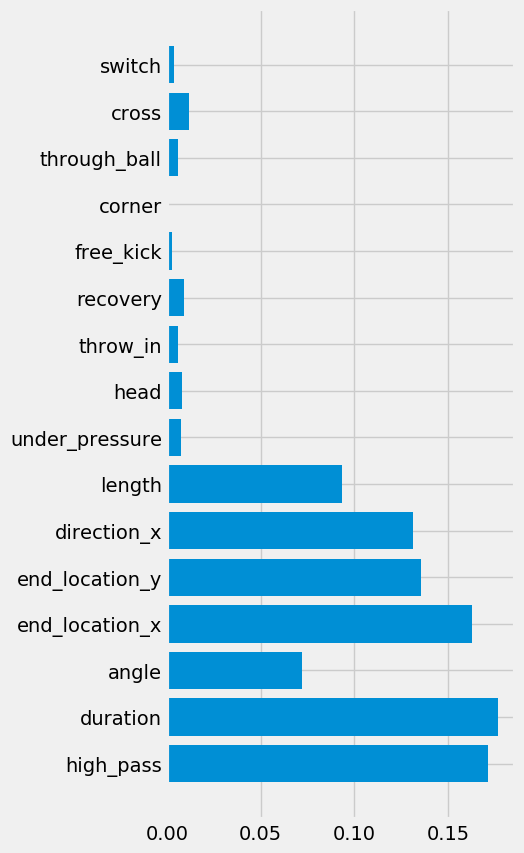

In [32]:
plt.figure(figsize=(4,10))
plt.barh(X_train.columns, model.feature_importances_)
plt.show()

Modellanwendung

In [33]:
# Predictions
passes.loc[:, 'pred_accuracy'] = model.predict_proba(X)[:, 1]

In [34]:
# Save Model
import joblib
_ = joblib.dump(model, 'models/pass_accuracy_model.pkl')

In [35]:
# Save selected_features
import pickle
with open("models/passes_selected_features.txt", "wb") as fp:
    pickle.dump(selected_features, fp)

In [36]:
# Save Predictions
passes.to_excel('extracted_data/passes.xlsx', columns=passes.columns, index=False)

Modellevaluierung

In [37]:
pearsonr(passes['complete'], passes['pred_accuracy'])

(0.7710286185499342, 0.0)

In [38]:
passes['complete'].sum()

414517

In [39]:
int(passes['pred_accuracy'].sum())

414235

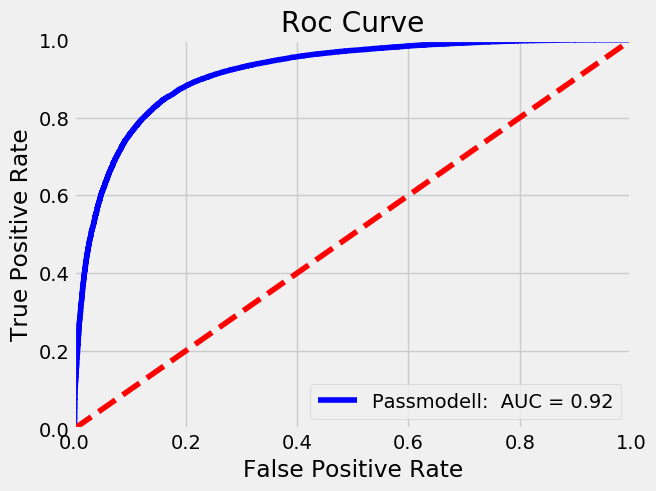

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Passmodell:  AUC = %0.2f' % roc_auc)
plt.title('Roc Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()